In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

!pip install accelerate

!pip install transformers[torch]

!pip install datasets

!pip install -U imbalanced-learn

!pip install torch scikit-learn numpy








     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-l

In [ ]:
import os
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, pipeline
import torch
from sklearn.utils.class_weight import compute_class_weight

import nltk
from transformers.trainer import IntervalStrategy
from transformers.trainer_callback import EarlyStoppingCallback



nltk.download('wordnet')

nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer


from transformers import Trainer

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import RandomOverSampler
from datasets import load_metric
import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import re
from nltk import download
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

import numpy as np
from datasets import load_metric

import nltk
from nltk import ngrams
from collections import Counter

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"


In [ ]:


url = '/content/drive/MyDrive/LP5_sentimental_analysis/Train (1).csv'
url1 = '/content/drive/MyDrive/LP5_sentimental_analysis/Test (1).csv'
df = pd.read_csv(url)
df_test = pd.read_csv(url1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [ ]:
df.shape

(10001, 4)

In [ ]:
df.isna().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

In [ ]:
# A way to eliminate rows containing NaN values
df = df[~df.isna().any(axis=1)]
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
df.isna().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [ ]:
df

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
...,...,...,...,...
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.0,1.000000
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0,0.666667
9998,ST3A265H,Interesting trends in child immunization in Ok...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000


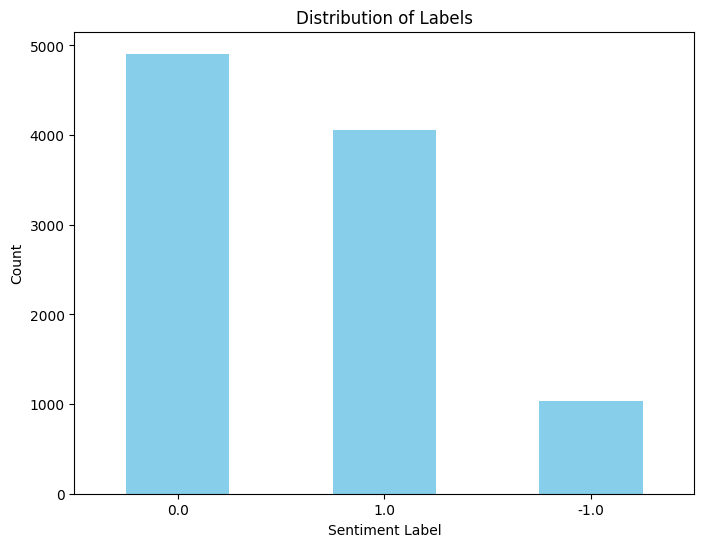

In [ ]:


# Assuming 'df' is your DataFrame containing the data
label_counts = df['label'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8,6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
label_counts = df['label'].value_counts()
print(label_counts)


 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64


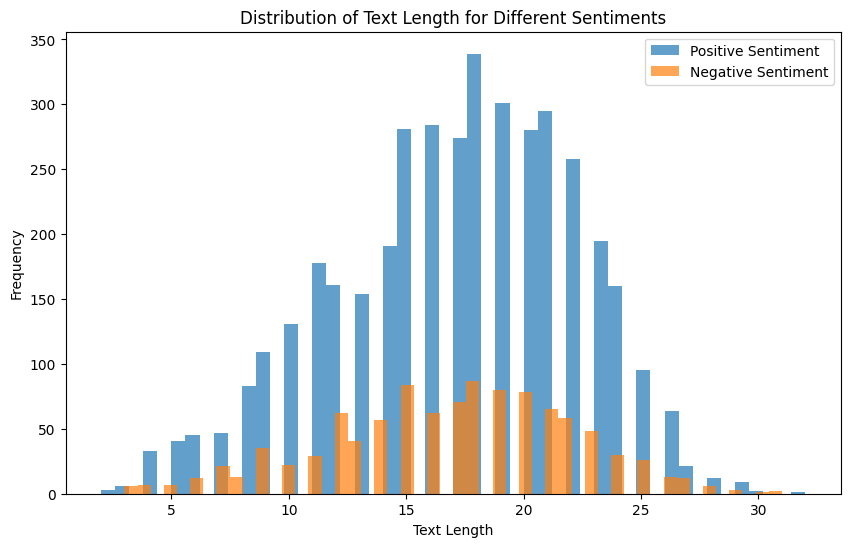

In [ ]:


# Assuming 'df' is your DataFrame containing the data
df['text_length'] = df['safe_text'].apply(lambda x: len(x.split()))

# Separate data based on labels
positive_texts = df[df['label'] == 1.0]['text_length']
negative_texts = df[df['label'] == -1.0]['text_length']

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(positive_texts, bins=50, alpha=0.7, label='Positive Sentiment')
plt.hist(negative_texts, bins=50, alpha=0.7, label='Negative Sentiment')
plt.title('Distribution of Text Length for Different Sentiments')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


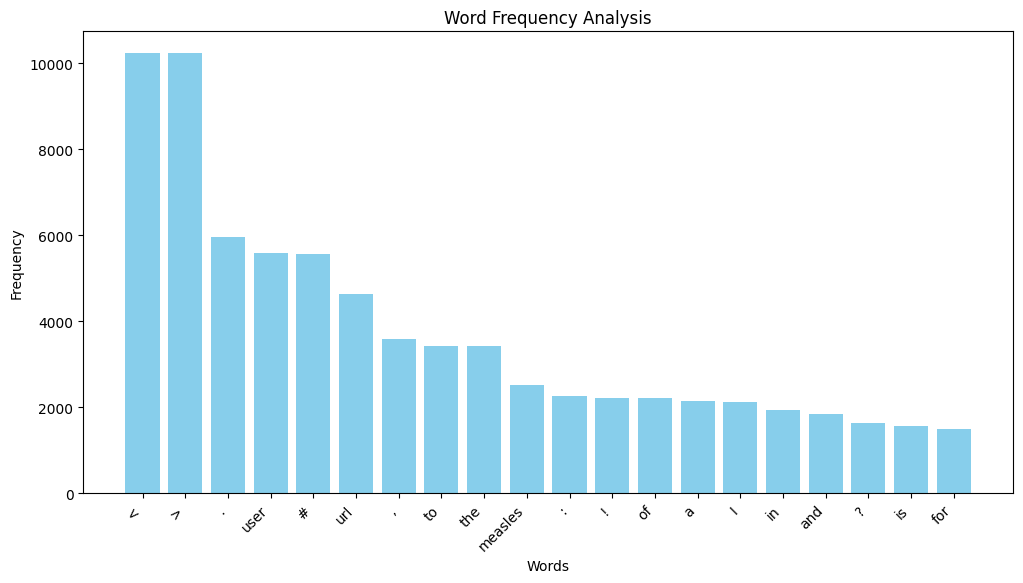

In [ ]:


# Assuming 'df' is your DataFrame containing the data
# Assuming 'safe_text' is the column containing the text data
all_text = ' '.join(df['safe_text'].values.tolist())
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Get the most common 20 words
most_common_words = word_freq.most_common(20)

# Visualize the most frequent words
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Word Frequency Analysis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:



# Text cleaning steps
df['safe_text'] = df['safe_text'].apply(lambda x: re.sub(r'&amp;', 'and', x))  # Handling specific HTML entities
df['safe_text'] = df['safe_text'].apply(lambda x: x.lower())  # Lowercasing
df['safe_text'] = df['safe_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Removing punctuation
stop_words = set(stopwords.words('english'))
df['safe_text'] = df['safe_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))  # Removing stop words
lemmatizer = WordNetLemmatizer()
df['safe_text'] = df['safe_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))  # Lemmatization

# Print the cleaned DataFrame
print(df)

       tweet_id                                          safe_text  label  \
0      CL1KWCMY  big homie meanboy3000 meanboy mb mb mmr stegma...    0.0   
1      E3303EME  im 100 thinking devoting career proving autism...    1.0   
2      M4IVFSMS           whatcausesautism vaccine vaccinate child   -1.0   
3      1DR6ROZ4  mean immunize kid something wont secretly kill...   -1.0   
4      J77ENIIE  thanks user catch performing la nuit nyc 1134 ...    0.0   
...         ...                                                ...    ...   
9996   IU0TIJDI  living time sperm used waste jenny mccarthy be...    1.0   
9997   WKKPCJY6  user user spite measles outbreak judge mi thre...    1.0   
9998   ST3A265H  interesting trend child immunization oklahoma ...    0.0   
9999   6Z27IJGD  cdc say measles highest level decade url retur...    0.0   
10000  P6190L3Q  pneumonia vaccine woman w risk pulmonary disea...    1.0   

       agreement  text_length  
0       1.000000           15  
1       1.0

In [ ]:

# Assuming 'safe_text' is the column containing the text data
text_data = ' '.join(df['safe_text'].values.tolist())
tokens = nltk.word_tokenize(text_data)

# Define a function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [ ' '.join(grams) for grams in n_grams]

# Set the value of 'n' for the desired n-grams
n = 2  # Example for bigrams, you can change this to 3 for trigrams, and so on
all_ngrams = generate_ngrams(tokens, n)

# Count the frequency of each n-gram
ngram_freq = Counter(all_ngrams)

# Print the most common 20 n-grams
print(ngram_freq.most_common(20))


[('user user', 1249), ('url user', 1125), ('measles outbreak', 502), ('vaccinate kid', 369), ('measles case', 311), ('vaccinate child', 246), ('health official', 229), ('url url', 207), ('user measles', 201), ('cause autism', 201), ('flu vaccine', 188), ('rt user', 185), ('measles url', 183), ('via user', 182), ('increase immunity', 171), ('tension increase', 170), ('complain live', 167), ('live longer', 165), ('dont vaccinate', 163), ('people complain', 162)]


In [ ]:


# Split the data into train and test sets
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [ ]:
base_path = '/content/drive/MyDrive/LP5_sentimental_analysis/'
train.to_csv(base_path + "train_subset.csv", index=False)
eval.to_csv(base_path + "eval_subset.csv", index=False)

In [ ]:

# Assuming the files are in the 'My Drive' folder
#base_path = '/content/drive/My Drive/'

# Reading the CSV files
train_data = pd.read_csv(base_path + "train_subset.csv")
eval_data = pd.read_csv(base_path + "eval_subset.csv")

# Load the dataset from a CSV file
dataset = load_dataset('csv', data_files={'train': '/content/drive/My Drive/train_subset.csv', 'eval': '/content/drive/My Drive/eval_subset.csv'}, encoding='ISO-8859-1')


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement', 'text_length', 'token_text', 'stop_text', 'stemmed'],
        num_rows: 7999
    })
    eval: Dataset({
        features: ['tweet_id', 'safe_text', 'label', 'agreement', 'text_length', 'token_text', 'stop_text', 'stemmed'],
        num_rows: 2000
    })
})

In [ ]:


# Assuming 'datasets' is a list of datasets and 'transform_labels_to_indice' is a function that transforms labels to indices.

# Assuming you have loaded the 'train' dataset

def transform_labels_to_indice(dataset):
    # Your transformation logic here
    pass

datasets = []  # Fill in your datasets here

datasets = [transform_labels_to_indice(dataset) for dataset in datasets]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

labels = train['label'].tolist()

class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

class_weights_tensor = torch.tensor([class_weights_dict[i] for i in range(len(class_weights_dict))], dtype=torch.float).to(device)

# Make sure to use the correct indices inside the class_weights_dict.

# Rest of your code...


In [ ]:

# Load the tokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Define the transformation functions
def transform_labels(label):
    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2
    return {'labels': num}

def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length')

# Apply the transformations to the dataset
dataset = dataset.map(tokenize_data, batched=True)
remove_columns = ['tweet_id', 'safe_text', 'label', 'agreement', 'text_length', 'token_text', 'stop_text', 'stemmed']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)


Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
#Define the training arguments
training_args = TrainingArguments(
    output_dir='./finals',
    evaluation_strategy=IntervalStrategy.STEPS,
    save_strategy=IntervalStrategy.STEPS,
    save_steps=500,
    load_best_model_at_end=True,
    num_train_epochs=7,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=3e-5,
    weight_decay=0.01,
    warmup_steps=500,
    logging_steps=500,
    gradient_accumulation_steps=16,
    dataloader_num_workers=2,

)



# Define the early stopping callback
early_stopping = EarlyStoppingCallback(
    early_stopping_patience=3,
    early_stopping_threshold=0.01,
)

# Combine the training arguments and the early stopping callback
training_args.callbacks = [early_stopping]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:


# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset = dataset['train'].shuffle(seed=10) #.select(range(40000)) # to select a part
eval_dataset = dataset['eval'].shuffle(seed=10)


In [ ]:
trainer= Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [ ]:

# Launch the learning process: training
trainer.train()

Step,Training Loss,Validation Loss
500,0.692400,0.596707


TrainOutput(global_step=875, training_loss=0.509689217703683, metrics={'train_runtime': 2704.9216, 'train_samples_per_second': 20.7, 'train_steps_per_second': 0.323, 'total_flos': 7417379329016832.0, 'train_loss': 0.509689217703683, 'epoch': 7.0})

In [ ]:
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)


<ipython-input-29-bbd907612339>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
# Launch the final evaluation
trainer.evaluate()

{'eval_loss': 0.5967071056365967,
 'eval_accuracy': 0.757,
 'eval_runtime': 37.5564,
 'eval_samples_per_second': 53.253,
 'eval_steps_per_second': 13.313}